In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/sample_data/cybersecurity_intrusion_data.csv")

In [ ]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [ ]:
df.drop(['session_id','encryption_used'],axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   object 
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   ip_reputation_score  9537 non-null   float64
 5   failed_logins        9537 non-null   int64  
 6   browser_type         9537 non-null   object 
 7   unusual_time_access  9537 non-null   int64  
 8   attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 670.7+ KB


In [ ]:
df.protocol_type.value_counts()

,count
protocol_type,
TCP,6624
UDP,2406
ICMP,507


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
df['protocol_type'] = LE.fit_transform(df['protocol_type'])

In [ ]:
df['protocol_type'].value_counts()

,count
protocol_type,
1,6624
2,2406
0,507


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   int64  
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   ip_reputation_score  9537 non-null   float64
 5   failed_logins        9537 non-null   int64  
 6   unusual_time_access  9537 non-null   int64  
 7   attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 596.2 KB


In [ ]:
df.drop('browser_type',axis = 1,inplace = True)

DATA VISUALIZATIONS TIME:-

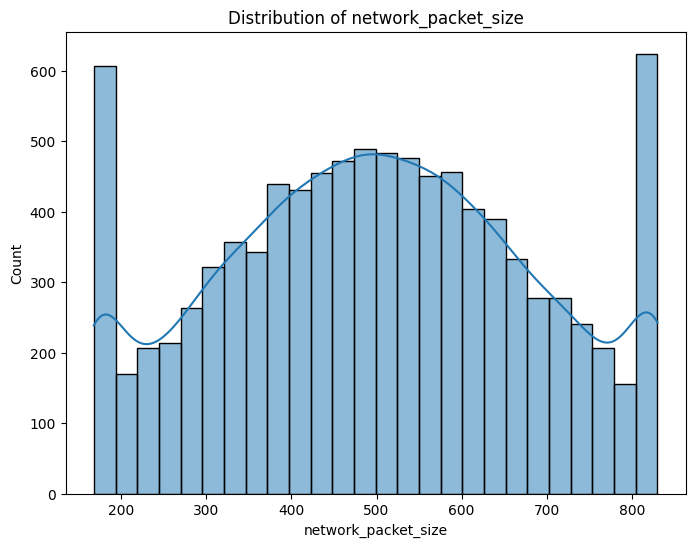

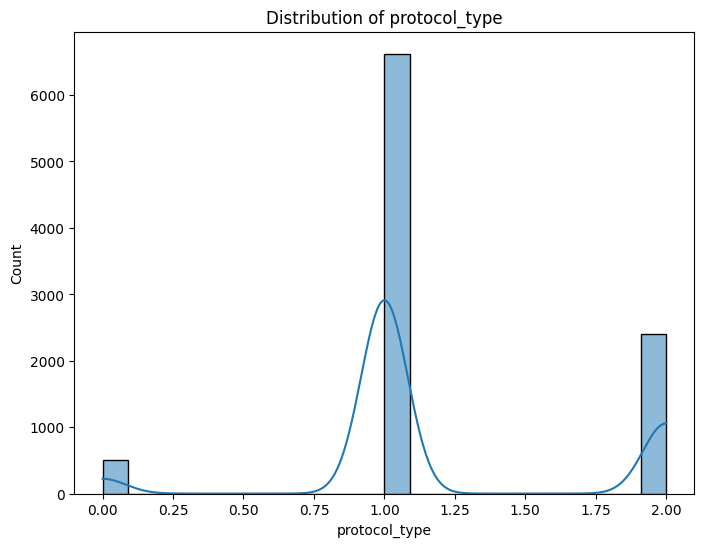

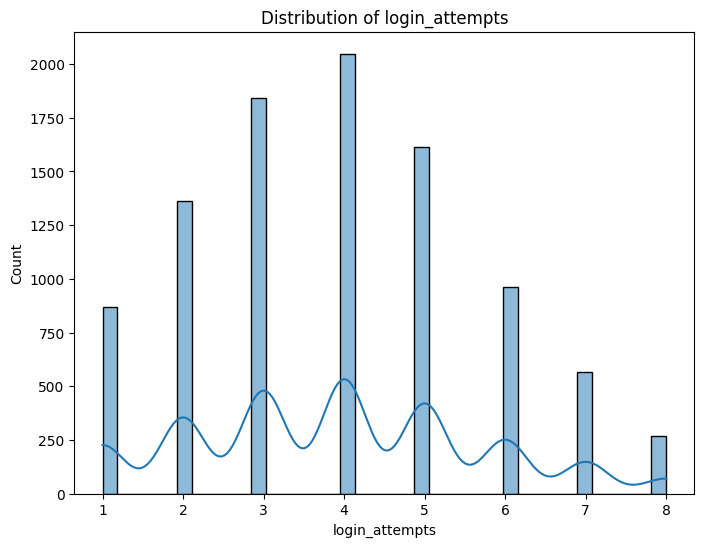

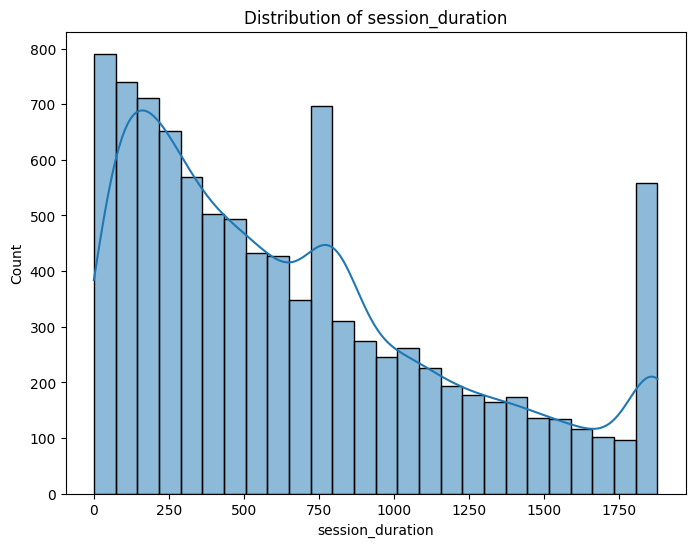

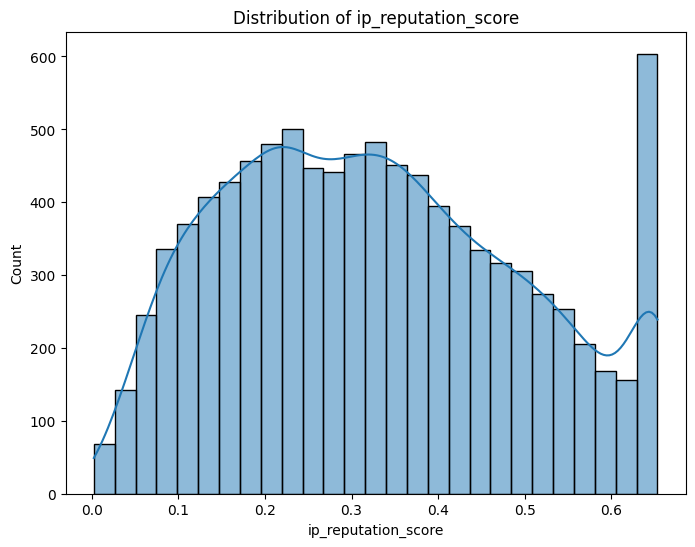

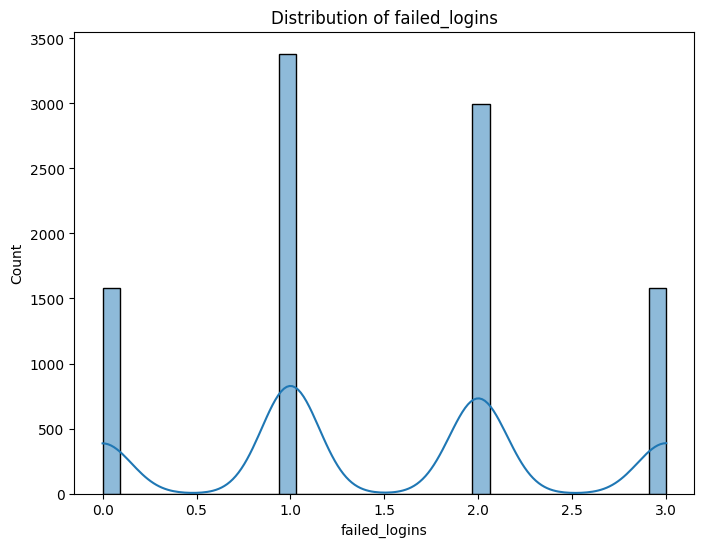

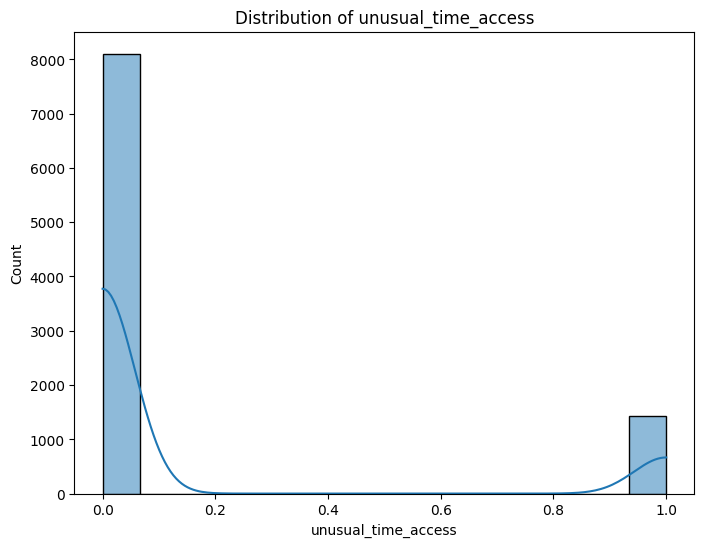

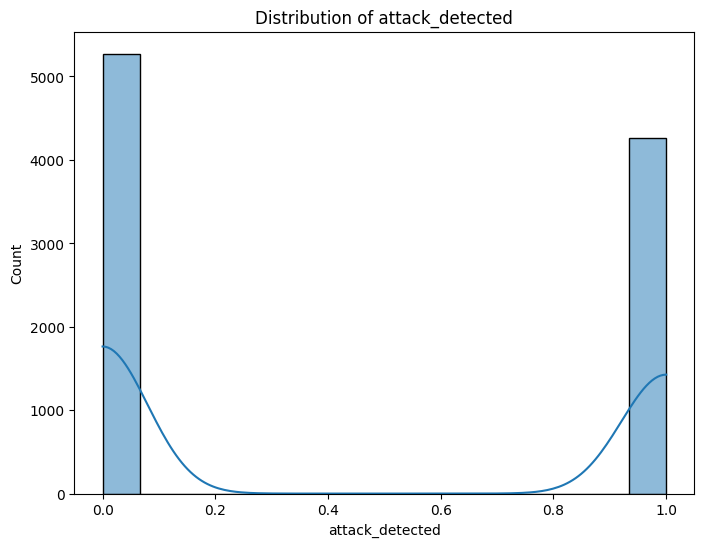

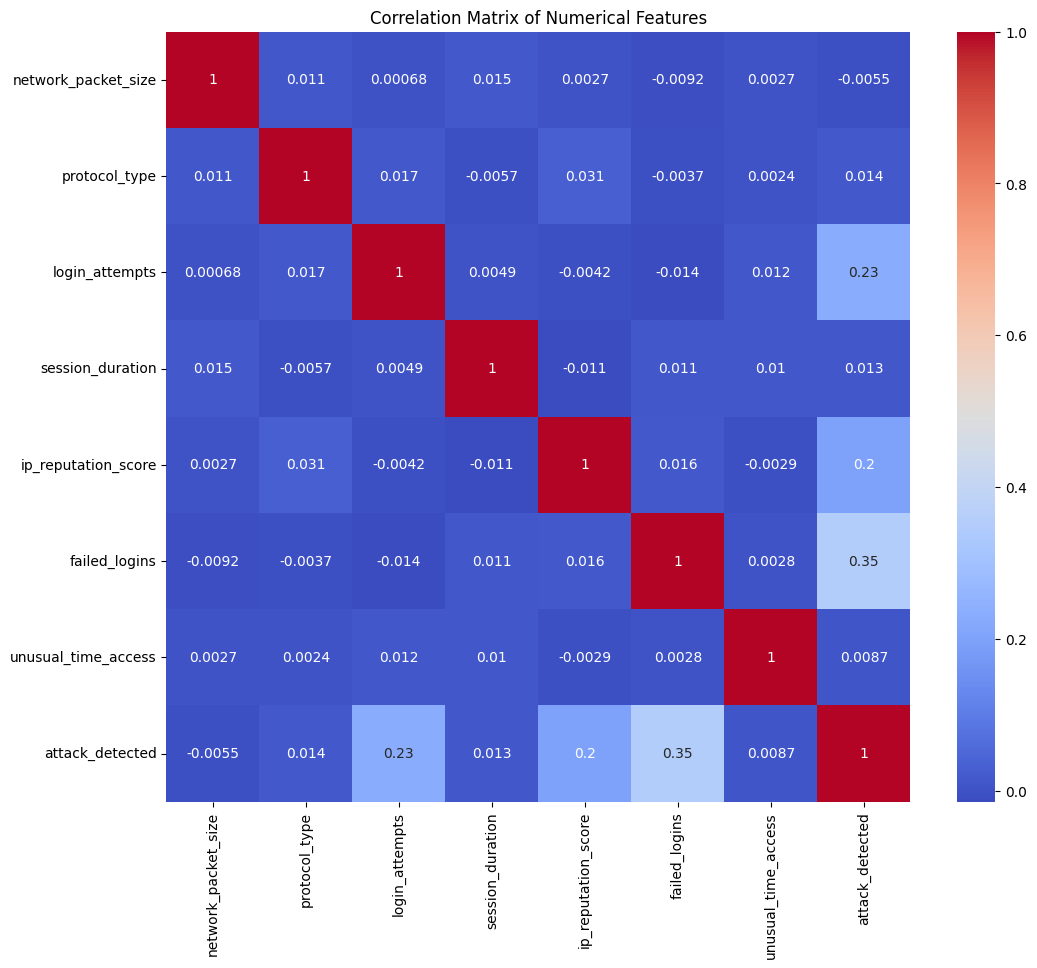

In [ ]:
# generate suitable visualizations for the columns present in the df

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df' is your DataFrame as defined in the previous code.

# Histograms for numerical features
for col in df.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


    #since we using boxplot in order to remove outliers and scale numerical values to suitable size, its not necessary to use them right now.


# Countplots for categorical features
for col in df.select_dtypes(exclude=np.number):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

REMOVING OUTLIERS AND UNWANTED FEATURES LIKE NULL VALUES FROM DATA:-

<Axes: >

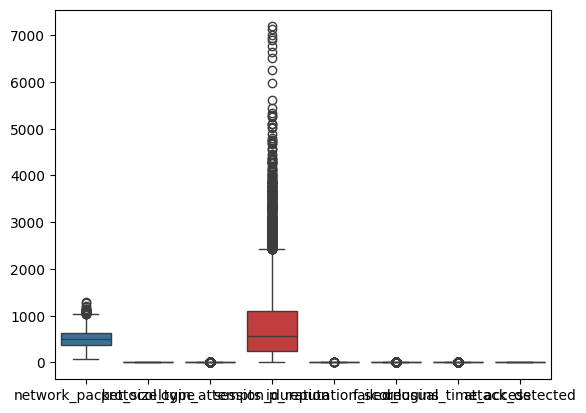

In [ ]:
sns.boxplot(df)

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
df['network_packet_size'] = winsorize(df['network_packet_size'],limits = [0.05,0.05])

<Axes: ylabel='protocol_type'>

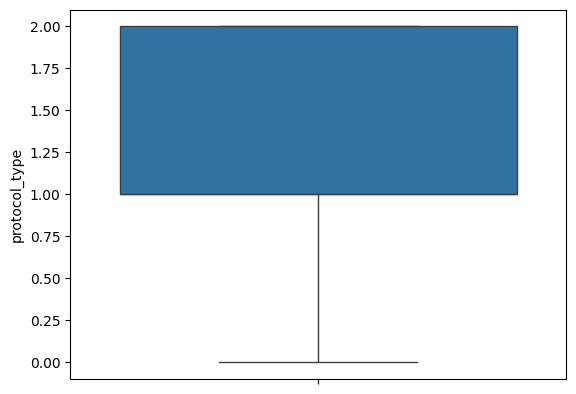

In [ ]:
sns.boxplot(df['protocol_type'])

<Axes: ylabel='login_attempts'>

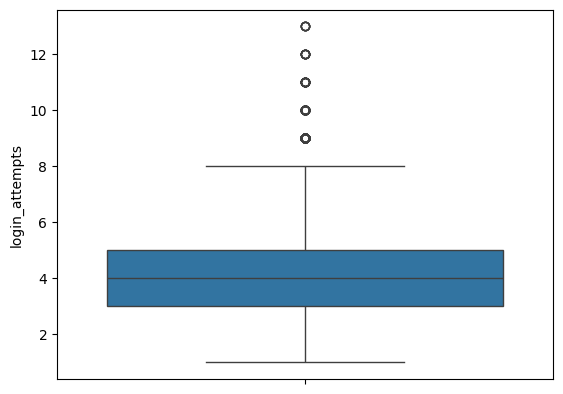

In [ ]:
sns.boxplot(df['login_attempts'])

In [ ]:
df.loc[df['login_attempts'] > 8,'login_attempts'] = np.mean(df['login_attempts'])

<ipython-input-29-aeaa2ac87619>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.032085561497326' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['login_attempts'] > 8,'login_attempts'] = np.mean(df['login_attempts'])


<Axes: ylabel='login_attempts'>

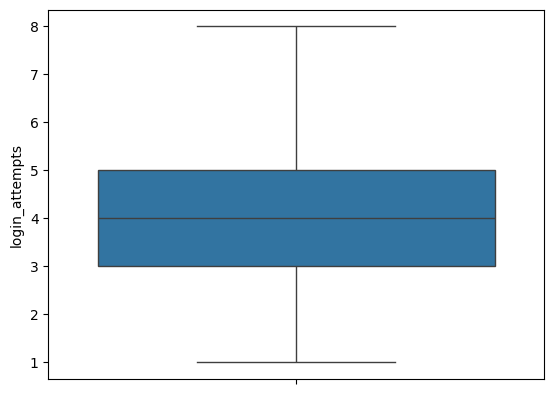

In [ ]:
sns.boxplot(df['login_attempts'])

<Axes: ylabel='session_duration'>

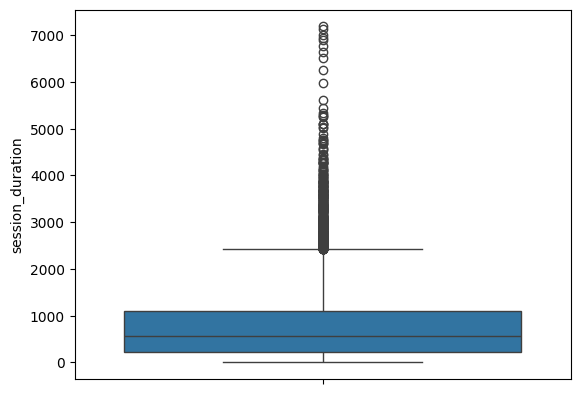

In [ ]:
sns.boxplot(df['session_duration'])

In [ ]:
df.loc[df['session_duration']>2500,'session_duration'] = np.mean(df['session_duration'])

<Axes: ylabel='session_duration'>

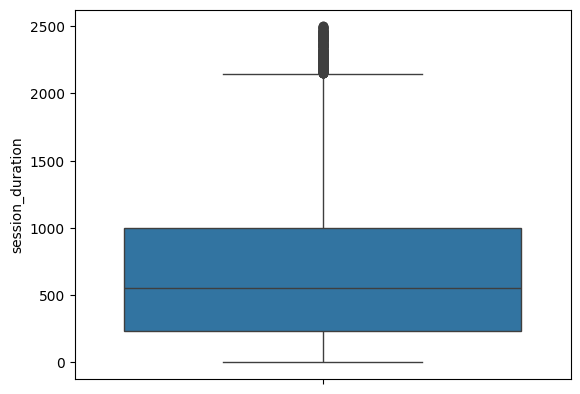

In [ ]:
sns.boxplot(df['session_duration'])

In [ ]:
df['session_duration'] = winsorize(df['session_duration'],limits = (0,0.05))

<Axes: ylabel='session_duration'>

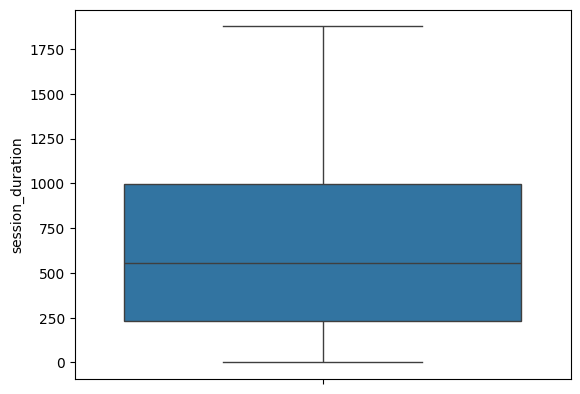

In [ ]:
sns.boxplot(df['session_duration'])

In [ ]:
df.columns

Index(['network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'ip_reputation_score', 'failed_logins',
       'unusual_time_access', 'attack_detected'],
      dtype='object')

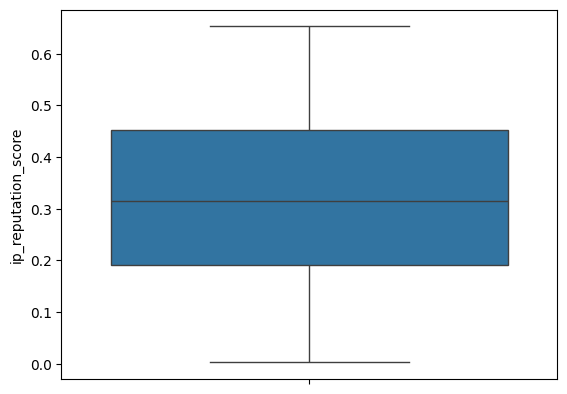

In [ ]:
sns.boxplot(df['ip_reputation_score'])
df.loc[df['ip_reputation_score']>8,'ip_reputation_score'] = np.mean(df['ip_reputation_score'])

<ipython-input-41-fcfd4241070e>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.4804445842508127' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['failed_logins']>3,'failed_logins'] = np.mean(df['failed_logins'])


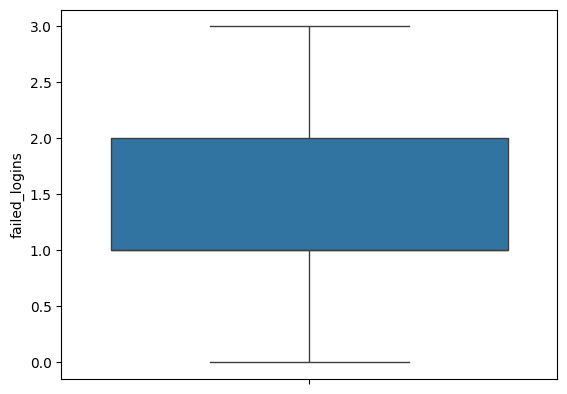

In [ ]:
sns.boxplot(df['failed_logins'])
df.loc[df['failed_logins']>3,'failed_logins'] = np.mean(df['failed_logins'])

<Axes: ylabel='unusual_time_access'>

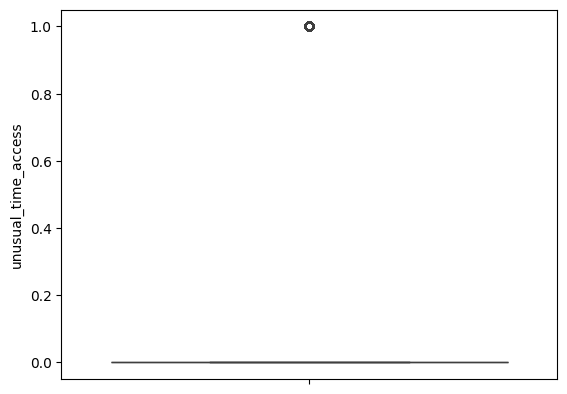

In [ ]:
sns.boxplot(df['unusual_time_access'])


<Axes: >

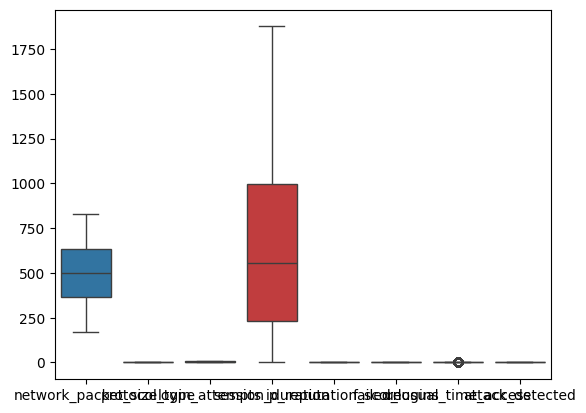

In [ ]:
sns.boxplot(df)

MODEL SELECTION AND TRAINING:-

In [ ]:
x=df.drop(["attack_detected"],axis=1)
y=df["attack_detected"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFC.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8642557651991615

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1028,   14],
       [ 245,  621]])

In [ ]:
precision_score(y_test,y_pred)

0.9779527559055118

USING MULTIPLE ML ALGORITHMS TO FIND THE BEST FITTING ALGORITHM FOR THIS PROJECT:-

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
LR = LogisticRegression()
NB = GaussianNB()
DT = DecisionTreeClassifier()
GB = GradientBoostingClassifier()

In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred1 = LR.predict(x_test)
y_pred2 = NB.predict(x_test)
y_pred3 = DT.predict(x_test)
y_pred4 = GB.predict(x_test)

In [ ]:
y_pred1.shape

(1908,)

In [ ]:
y_pred2.shape

(1908,)

In [ ]:
print("Logistic Regression ACC Score:",accuracy_score(y_test,y_pred1))

0.7206498951781971

In [ ]:
print("Naive Bayes ACC Score:",accuracy_score(y_test,y_pred2))

Naive Bayes ACC Score: 0.7987421383647799


In [ ]:
print("Decision Tree ACC Score:",accuracy_score(y_test,y_pred3))

Decision Tree ACC Score: 0.7809224318658281


In [ ]:
print("Gradient Boosting ACC Score:",accuracy_score(y_test,y_pred4))

Gradient Boosting ACC Score: 0.8684486373165619


In [ ]:
print("Random forest ACC score",accuracy_score(y_test,y_pred))

Random forest ACC score 0.8642557651991615


VISUALIZING THE ACCURACY SCORES,PRECISION SCORES AND RECALL SCORES OF DIFFERENT ALGORITHMS USED:-

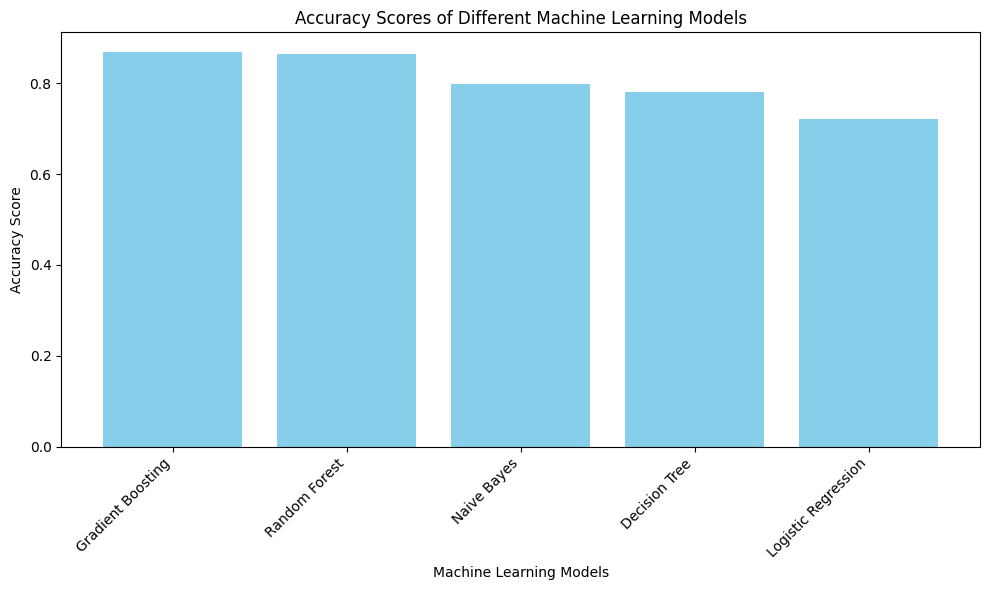

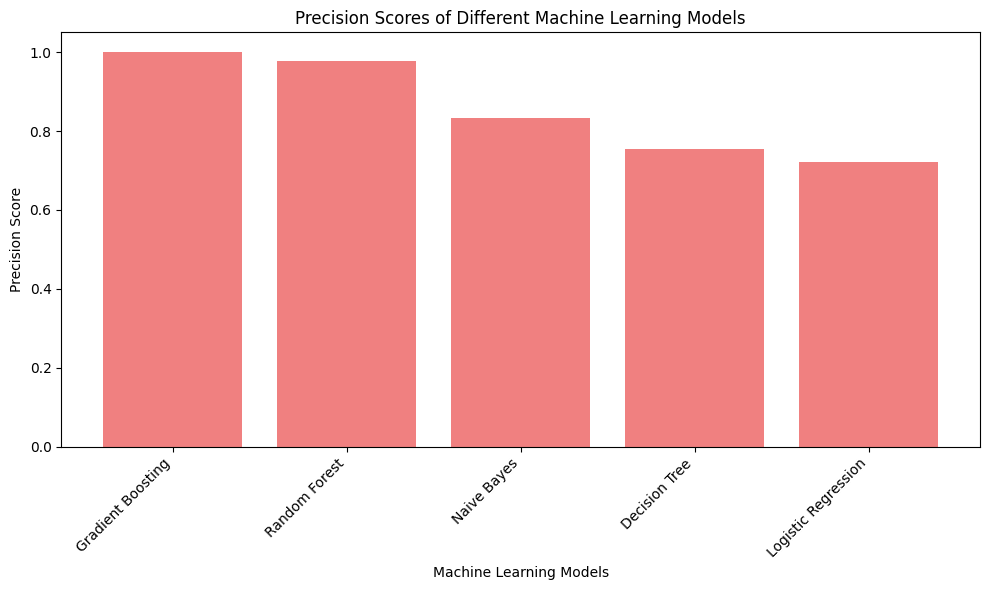

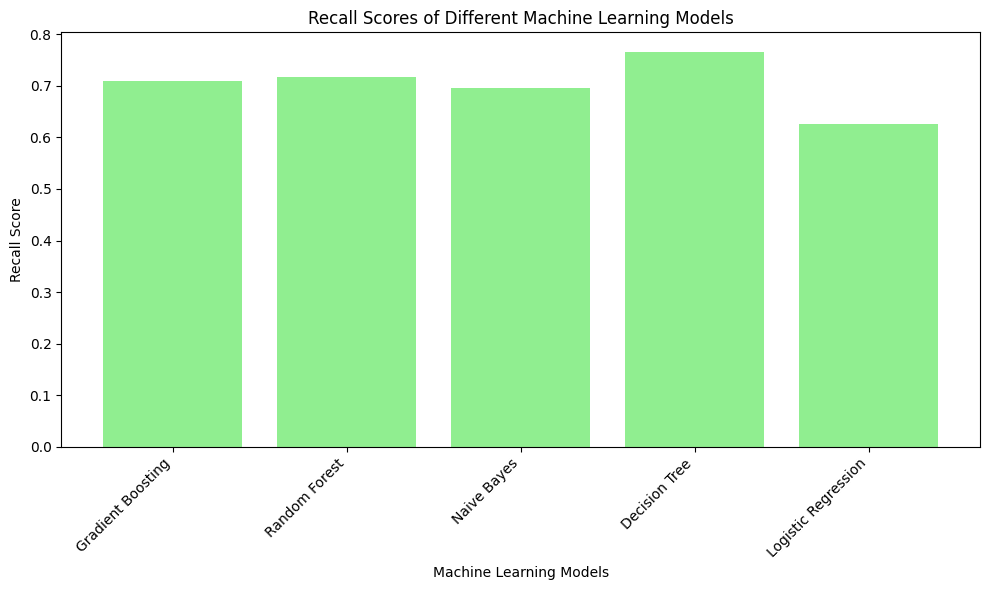

In [ ]:
# prompt: generate graphs comparing the accuracy score, precision and recall score of all the used machine learning algorithms above and sort them based upon their values.

import matplotlib.pyplot as plt
import pandas as pd
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Gradient Boosting', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3), accuracy_score(y_test, y_pred4), accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred1), precision_score(y_test, y_pred2), precision_score(y_test, y_pred3), precision_score(y_test, y_pred4), precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3), recall_score(y_test, y_pred4), recall_score(y_test, y_pred)]
}


results_df = pd.DataFrame(results)

#Sort the dataframe by accuracy, precision, and recall
results_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Recall'], ascending=False)


# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Machine Learning Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plotting Precision
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Precision'], color='lightcoral')
plt.xlabel("Machine Learning Models")
plt.ylabel("Precision Score")
plt.title("Precision Scores of Different Machine Learning Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plotting Recall
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Recall'], color='lightgreen')
plt.xlabel("Machine Learning Models")
plt.ylabel("Recall Score")
plt.title("Recall Scores of Different Machine Learning Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
